![alt text](https://theme.zdassets.com/theme_assets/268930/1c43f629ec1e48323c4620d081c559184af7b036.png "Logo Deci")

# Project: Movies Dataset Analysis

## Table of Contents :
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction :

### Dataset Description :
_This data set, which includes user ratings, budgets, and revenue for 10867 movies, was gathered from the IMDb website. We will analysis the data associated with movies and attempt to identify the Correlation between several variables and find why some movies has more revenue than others._
<ul>
    <li>columns like cast and genres has multiple values separated by {|}.</li>
    <li>columns for budget and revenue of movie.</li>
    <li>columns ending with (_adj)  show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
    <li>The director, production company, and cast columns provide details about the film's crew.</li>
</ul>

### Questions for Analysis :
<ul>
<li>Q1 : what are 10 ranked movies  according to budget , revenue , popularity ?</li>
<li>Q2 : Does popularity and vote_average affects the revenue ?</li>
<li>Q3 : classify movies according to profit [High profit, normal profit, low profit].</li>
<li>Q4 : what are top 10 movies in profit ?</li>
<li>Q5 : what are top 10 movies in runtime ?</li>
<li>Q6 : what are least 10 movies in runtime ?</li>
<li>Q7 : what are top 10 actors in number of movies and genres of movies they make ?</li>
<li>Q8 : what are top 10 actors in total of revenue ?</li>
<li>Q9 : what are top director in vote_avarage and the number of movies they make ?</li>
<li>Q10 : what top probuction companies in number of movies ?</li>
<li>Q11 : What production companies are ready to fund a big movie ?</li>
<li>Q12 : What are the most profitable companies ?</li>
<li>Q13 : Does the number of movies produced increase over the years ?</li>
<li>Q14 : Are the movies released in the year specific to a specific season according to the months ?</li>
<li>Q15 : What is the total number of movies in each genre? </li> 
<li>Q16 : What is the number of movies in the top 5 genres over the years ?</li>
<li>Q17 : what is profits types of movies over years ?</li>
<li>Q18 : Classify movies as successful or failed.</li>
<li>Q19 : The number of movies over years are successful and failed.</li>
<li>Q20 : What are the number of successful and failed films in the 20th and 21th centuries ?</li>
</ul>

In [146]:
# import statements for all of the packages that i willl use in the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling :
_In this process, I will load the data as a CSV file to access it, then I will clean it to remove duplicates and Nan values and drop unused columns._

In [147]:
# load data set as csv file 
movie_df = pd.read_csv('tmdb-movies.csv')
#show first 5 rows of data set 
movie_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [148]:
#show last 5 rows from Data set 
movie_df.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [149]:
#return values representing the dimensionality of the Dataset
movie_df.shape

(10866, 21)

#### Dataset dimensions : 
_Dataset consist of 21 columns and 10866 rows._

_I use shape and head functions to get dimensions of Dataset._

In [150]:
#prints information about a Dataframe including the index dtype and columns, non-null values and rows .
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [151]:
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution and standard deviation of quantitive Data . 
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [152]:
#print the descriptive data but for catergorical data including count and top frequenced 
movie_df.describe(include='object')

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,woman director,No overview found.,Comedy,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


### Movies Dataset General Properties : 
<ul>
    <li>The Dataset consist of 21 columns and 10866 rows.</li>
    <li>Ten  columns are quantitive Data like budget and revenue.</li>
    <li>Eleven columns are catergorical Data like cast and director.</li>
    <li>There is columns contian missing values like production_company column.</li>
    <li>There is columns contian zero values (outliers) like budget column.</li>
    <li>Release_Date column its Data type is wrong.</li>
</ul>

### Data Cleaning :
_In this process, I will clean data and prepare it for analysis._
<ul>
    <li>First : I will remove unused columns.</li>
    <li>Second : I willl remove duplicate Rows.</li>
    <li>Third : Change data type of release_date column to (datetime).</li>
    <li>Fourth : Handling Nan values.</li>
    <li>Fifth : Handling Outliers.</li>
</ul>

#### Removing Unused Columns :
_Removing these columns:_

<ul>
    <li>id column.</li>
    <li>imdb_id	column.</li>
    <li>homepage column.</li>
</ul>

_I will remove this columns by using drop function ._

In [153]:
#drop these columns from dataset
movie_df.drop(['id', 'imdb_id', 'homepage'], axis = 1, inplace = True)

In [154]:
#show first 2 rows
movie_df.head(2)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


#### Removing Duplicates :
_I'll see if there are any duplicate rows in the dataset._

_then I'll remove it if it  has duplicates._

In [155]:
#check if dataset contain duplicate rows
movie_df.duplicated().sum()

1

**_After checking if dataset contains duplicated rows or not ?_**

_The df contains 1 duplicated rows._

_I will remove it by using drop_duplicates function._

In [156]:
#removing duplicate rows
movie_df.drop_duplicates(inplace=True)

In [157]:
#dataset after removing duplicates
movie_df.duplicated().sum()

0

####  Convert data type of Release_date column : 
_I notice that the data type of release_date column is (string) but it should be (datetime)._

_I will make type casting for release_date column to (datetime)._

In [158]:
#the data type of release_date is string.
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   tagline               8041 non-null   object 
 7   keywords              9372 non-null   object 
 8   overview              10861 non-null  object 
 9   runtime               10865 non-null  int64  
 10  genres                10842 non-null  object 
 11  production_companies  9835 non-null   object 
 12  release_date          10865 non-null  object 
 13  vote_count            10865 non-null  int64  
 14  vote_average          10865 non-null  float64
 15  release_year          10

In [160]:
#change the data type of release_date.
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

In [161]:
#data type after casting
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget                10865 non-null  int64         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   cast                  10789 non-null  object        
 5   director              10821 non-null  object        
 6   tagline               8041 non-null   object        
 7   keywords              9372 non-null   object        
 8   overview              10861 non-null  object        
 9   runtime               10865 non-null  int64         
 10  genres                10842 non-null  object        
 11  production_companies  9835 non-null   object        
 12  release_date          10865 non-null  datetime64[ns]
 13  vote_count           

#### Handling Nan Values : 
_we will check if dataset contain missing values (Nan) ._

In [162]:
#check if dataset contains Nan  or not 
movie_df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [163]:
#Nan values in precentage by dividing it by number of rows minus one(10865) multiply * 100 .
Nan_list_precentage = (movie_df.isnull().sum()/10865)*100
Nan_list_precentage

popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699494
director                 0.404970
tagline                 25.991717
keywords                13.741371
overview                 0.036815
runtime                  0.000000
genres                   0.211689
production_companies     9.479982
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64


**_6 columns contains Nan values._**
<ul>
    <li>cast column contain 76 Nan values with precentage 0.699494%</li>
    <li>director column contain 44 Nan values with precentage 0.404970%</li>
    <li>tagline column contain 2824 Nan values with precentage 25.991717%</li>
    <li>overview column contain 4 Nan values with precentage 0.036815%</li>
    <li>genres column contain 23 Nan values with precentage 0.211689%</li>
    <li>production_companies contain column 1030 Nan values with precentage 9.479982%</li>
</ul>

**_I use isnull function to get how many missing values in data set and get their sum._**
**_I put the sum of nan values in list and divide the number of mising values  of each column to the number of rows and multiply it by 100 to get precentage_**

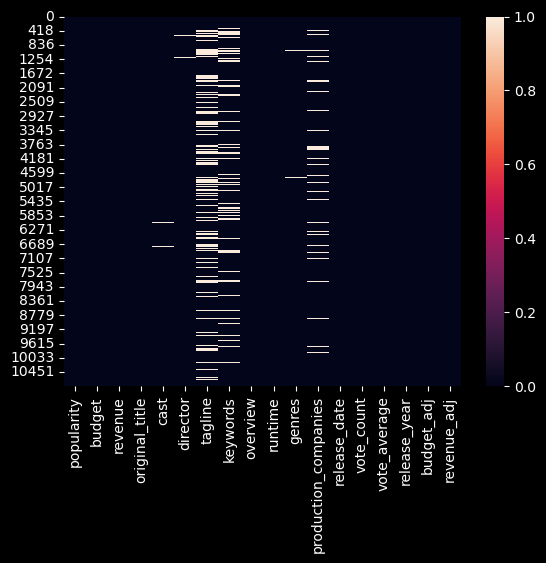

In [164]:
#heatmap visualization for the distribution of Nan values over the dataset
Nan = movie_df.isnull()
plt.style.use("dark_background")
sns.heatmap(Nan)
plt.show()


_This visualization shows the distribution of missing values over dataset and their ranges in rows._

_for example in tagline column the the heatmap the missing values appear over the column._

**_After see the Missing values , their precentage and i notice that all Nan are categorical data._**

<ul>
    <li>First : </li>
          In tagline column the precentage of missing values to all data set is 25% so i decided to drop all column instead drop rows.
    
          In keywords colums the precentag of missing values to all data set is 13.7% so i decided to drop all column instead drop rows.
          
          I decided to drop these columns becaues their precentage of Nan and to save data as much as possible.
          
          I didn't drop rows because i will lose a lot of data and I don't need this columns in my analysis.
</ul>
<ul>
    <li>Second : </li>
    
        In production_companies column the precentage of missing values to all data is 10%.

        I can't drop this column because i need it in my analysis.
        
        so I decided to fill the rows of missing values with unknown.

</ul>
<ul>
    <li>Third : </li>
    
        In director,cast,overview and genres columns their precentage of missing values to all data is less than 1%.

        so I decided to drop the rows of missing values.

</ul>

In [165]:
#removing tagline and keywords columns
movie_df.drop(['tagline','keywords'], axis = 1, inplace = True)

In [166]:
#fill missing values in production_companies column
movie_df['production_companies'].fillna('Unknown',inplace=True)

In [167]:
#sum of Nan in all dataset
movie_df.isnull().sum().sum()

147

In [168]:
#removing missing data .
movie_df.dropna(axis=0, how='any',inplace=True)

In [169]:
#Data set after handling Nan values
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10729 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10729 non-null  float64       
 1   budget                10729 non-null  int64         
 2   revenue               10729 non-null  int64         
 3   original_title        10729 non-null  object        
 4   cast                  10729 non-null  object        
 5   director              10729 non-null  object        
 6   overview              10729 non-null  object        
 7   runtime               10729 non-null  int64         
 8   genres                10729 non-null  object        
 9   production_companies  10729 non-null  object        
 10  release_date          10729 non-null  datetime64[ns]
 11  vote_count            10729 non-null  int64         
 12  vote_average          10729 non-null  float64       
 13  release_year         

#### Handling outliers

In [170]:
#desribe for some information about data
movie_df.describe()

,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10729.000000,1.072900e+04,1.072900e+04,10729.000000,10729,10729.000000,10729.000000,10729.000000,1.072900e+04,1.072900e+04
mean,0.652693,1.480641e+07,4.032740e+07,102.478609,2006-11-21 05:09:22.028147968,219.851151,5.964899,2001.257806,1.776861e+07,5.201592e+07
min,0.000188,0.000000e+00,0.000000e+00,0.000000,1974-01-01 00:00:00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210766,0.000000e+00,0.000000e+00,90.000000,1997-12-11 00:00:00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.387190,0.000000e+00,0.000000e+00,99.000000,2007-05-01 00:00:00,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.721427,1.600000e+07,2.500000e+07,112.000000,2012-09-11 00:00:00,148.000000,6.600000,2011.000000,2.110988e+07,3.470585e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2073-12-26 00:00:00,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09
std,1.004881,3.106679e+07,1.176621e+08,30.480653,NaN,578.862518,0.930260,12.820656,3.446866e+07,1.454370e+08


**_First : I will make boxplot to find it contians oultiers or not._**


In [171]:
#this is function make boxplot using seaborn and matplotlib i give it column name 
def boxplot_outlier(column):
    plt.boxplot(movie_df[column])
    plt.title(f'Boxplot of {column} column'.format())
    plt.ylabel('Values')
    plt.show()

**_popularity , vote average and vote count columns :_**


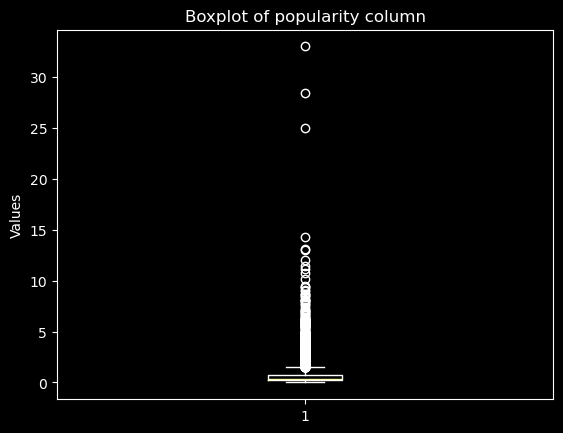

In [172]:
#boxplot for popularity  column 
boxplot_outlier('popularity')

_In popularity of some movies i notice that some movies are more popular than other more than 25._

_But most of popularity of movies between 0 and 15._

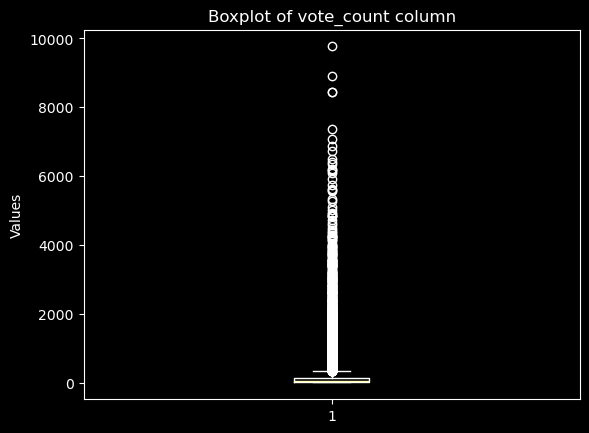

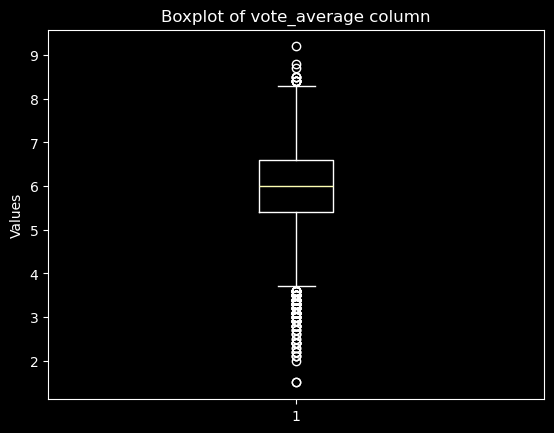

In [173]:
#boxplot for vote_count column 
boxplot_outlier('vote_count')
#boxplot for vote_average column 
boxplot_outlier('vote_average')

_In vote_count and average there is outliers but i will leave it because the number of people votes diff from movie to other._

**_budget, budget_adj, revenue and revnue columns :_**


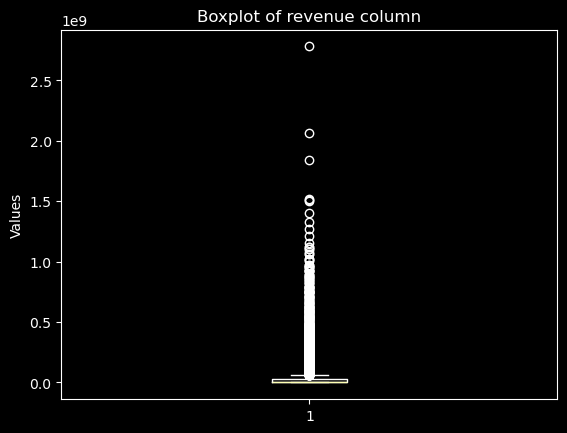

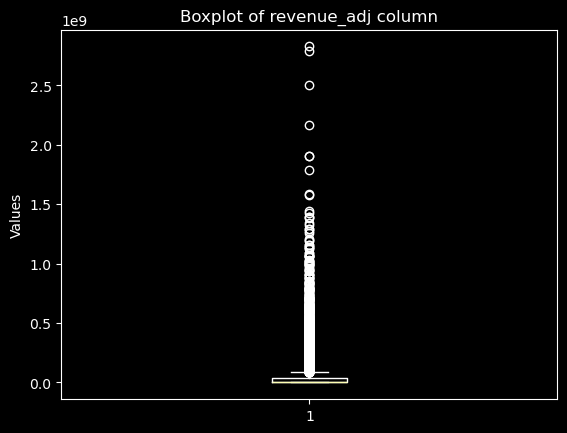

In [174]:
#boxplot for revenue column 
boxplot_outlier('revenue')
#boxplot for revenue_adj column 
boxplot_outlier('revenue_adj')

**_In revenue and revenue_dj :_**

_There some  movies didn't succeed then there revenue is zero and some movies are documentary and there is some movies there revenue is missing due to human error so I will leave outliers as it is and revenue_adj depend on revenue so there are same._

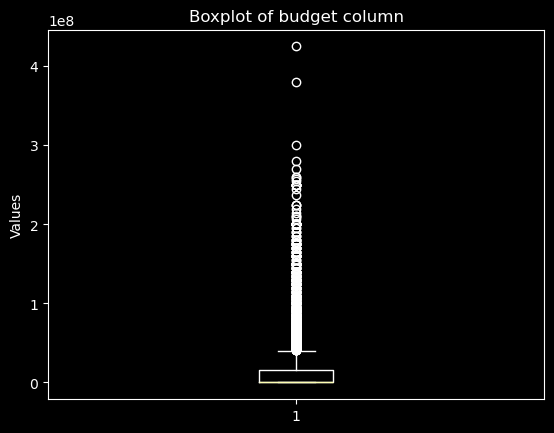

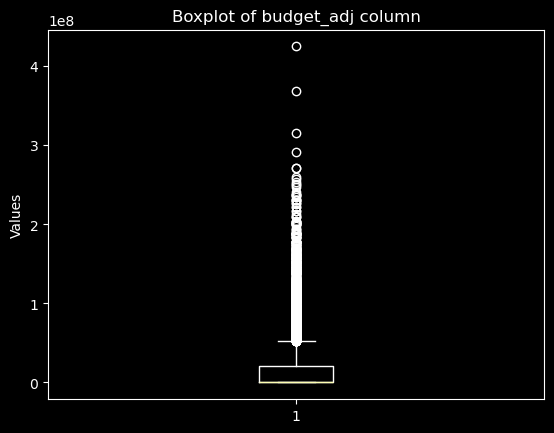

In [175]:
#boxplot for budget and budget_adj column 
boxplot_outlier('budget')
boxplot_outlier('budget_adj')

_In budget there is outliers and some movies has zero budget._

_So i will fill zeroes values with median because median doesn't affected by outliers and it isn't make sense that the budget of movies is 0 this may be human error so i will fill 0 by median._


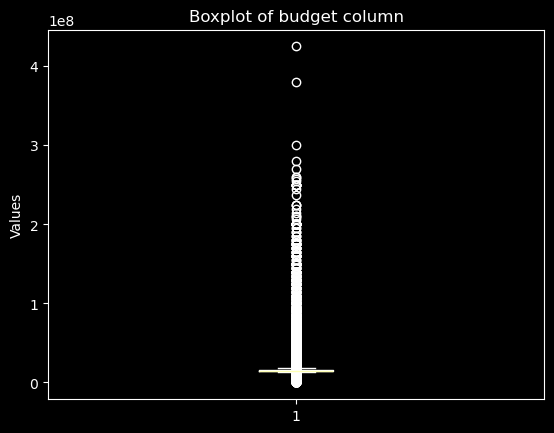

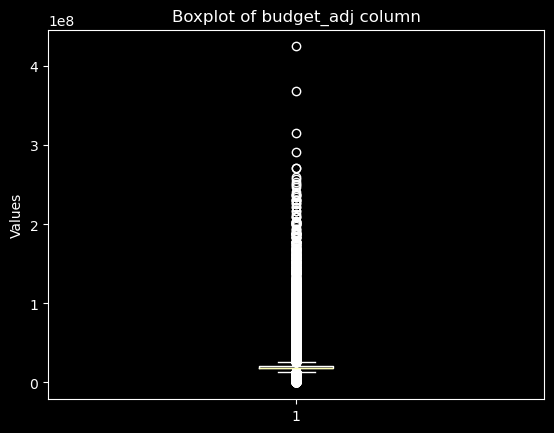

In [177]:
#get zoreos
zeroes_budget = movie_df['budget']==0
movie_df.loc[zeroes_budget, 'budget'] = movie_df['budget'].mean()
#fill it with mean
zeroes_budget_adj = movie_df['budget_adj']==0
movie_df.loc[zeroes_budget_adj,'budget_adj']=movie_df['budget_adj'].mean()
boxplot_outlier('budget')
boxplot_outlier('budget_adj')

_I fill zeroes in budget with mean and i know that mean is affected by outliers but I tried to use median but it fails becaues the number of zeroes is 5000 and median is 0 so if fill it with mean and budget_adj is depend on budget._


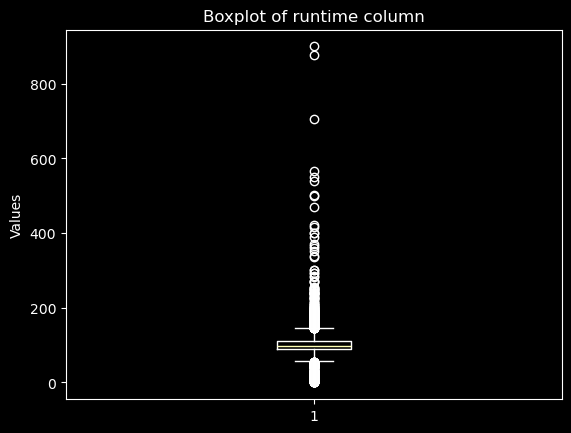

In [178]:
#boxplot for runtime column 
boxplot_outlier('runtime')

**_In runtime column :_**

_There is some movies have outliers there runtime is 0 and it must at least more than 0 not zero.
Some movie there runtime is more than 180 there are outlier but i will leave them.
So i will fill these zeroes with median._

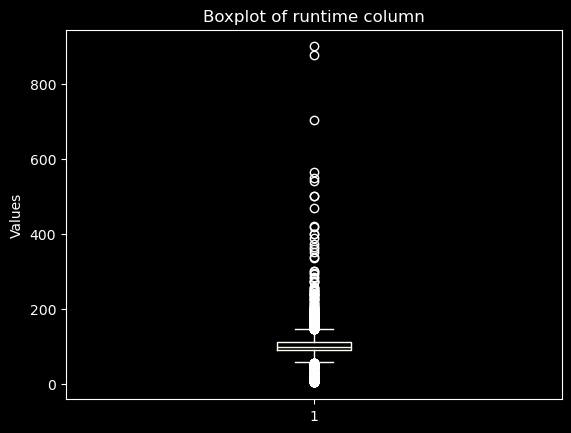

In [179]:
#here i fill zeroes wiht median
zeroes_runtime = movie_df['runtime']==0
movie_df.loc[zeroes_runtime,'runtime']=movie_df['runtime'].median()
boxplot_outlier('runtime')

**_After clean data :_**

_I will add month column which determine the month when movie released to use it to get seasons of movies over year._

_I will spilt column in cast,genres and production_companies by | to list of strings._

In [180]:
#add release month column to my df 
movie_df['release_month'] = movie_df['release_date'].dt.month

In [181]:
#convert from string seperated by | to list of strings 
movie_df['cast'] = movie_df['cast'].str.split('|')
#convert from string seperated by | to list of strings 
movie_df['genres'] = movie_df['genres'].str.split('|')
##convert from string seperated by | to list of strings 
movie_df['production_companies'] = movie_df['production_companies'].str.split('|')

In [182]:
#df before EDA
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10729 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10729 non-null  float64       
 1   budget                10729 non-null  float64       
 2   revenue               10729 non-null  int64         
 3   original_title        10729 non-null  object        
 4   cast                  10729 non-null  object        
 5   director              10729 non-null  object        
 6   overview              10729 non-null  object        
 7   runtime               10729 non-null  int64         
 8   genres                10729 non-null  object        
 9   production_companies  10729 non-null  object        
 10  release_date          10729 non-null  datetime64[ns]
 11  vote_count            10729 non-null  int64         
 12  vote_average          10729 non-null  float64       
 13  release_year         

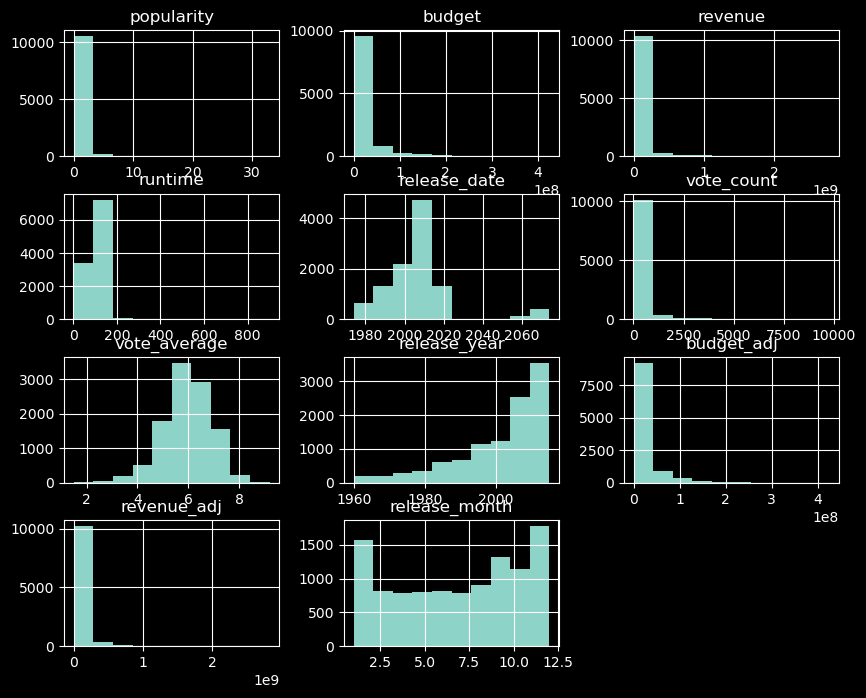

In [183]:
#some histograms of dataset
movie_df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis (EDA) :

### Research Question 1 (what are 10 ranked movies  according to budget , revenue , popularity ?) : 

In [184]:
#sort df descending according to budget
sorted_df_budget=movie_df.sort_values(by='budget',ascending=False)
#after i sort movies according to budget i get first top 10 movies 
sorted_df_budget.reset_index(inplace=True)
top10_movies=sorted_df_budget.loc[:10,['original_title','budget']]
#top 10 movies in budget 
top10_movies

,original_title,budget
0,The Warrior's Way,425000000.0
1,Pirates of the Caribbean: On Stranger Tides,380000000.0
2,Pirates of the Caribbean: At World's End,300000000.0
3,Avengers: Age of Ultron,280000000.0
4,Superman Returns,270000000.0
5,Tangled,260000000.0
6,John Carter,260000000.0
7,Spider-Man 3,258000000.0
8,The Lone Ranger,255000000.0
9,The Hobbit: The Battle of the Five Armies,250000000.0


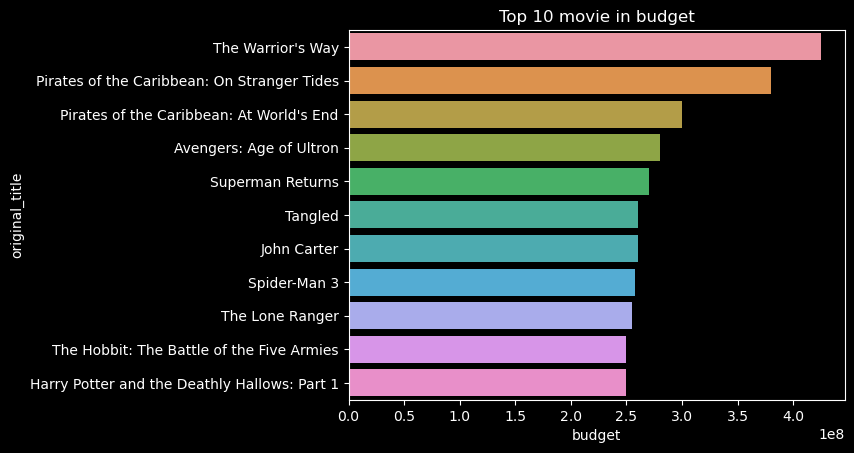

In [185]:
#barchart for top 10 movies in budget 
sns.barplot(x=top10_movies['budget'],y=top10_movies['original_title'])
plt.title('Top 10 movie in budget')
plt.show()

In [186]:
#sort df descending according to revenue
sorted_df_revenue=movie_df.sort_values(by='revenue',ascending=False)
#after i sort movies according to revenue i get first top 10 movies 
sorted_df_revenue.reset_index(inplace=True)
top10_movies=sorted_df_revenue.loc[:10,['original_title','revenue']]
#top 10 movies in budget 
top10_movies

,original_title,revenue
0,Avatar,2781505847
1,Star Wars: The Force Awakens,2068178225
2,Titanic,1845034188
3,The Avengers,1519557910
4,Jurassic World,1513528810
5,Furious 7,1506249360
6,Avengers: Age of Ultron,1405035767
7,Harry Potter and the Deathly Hallows: Part 2,1327817822
8,Frozen,1274219009
9,Iron Man 3,1215439994


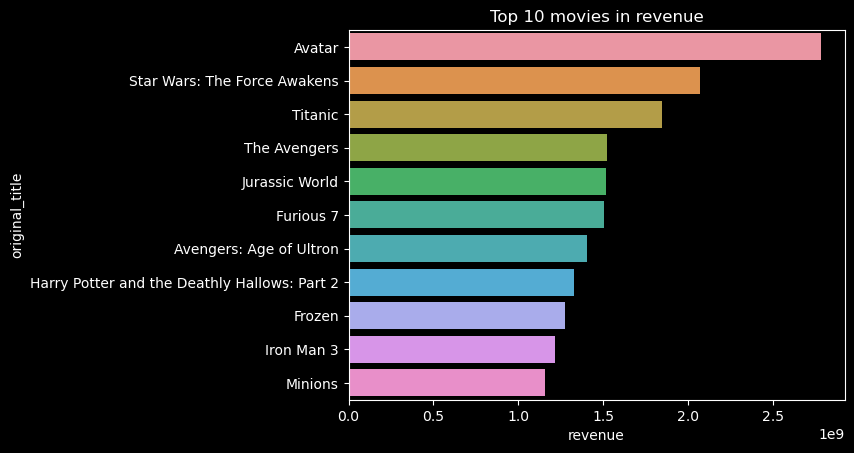

In [187]:
#barchart for top 10 movies in revenue
sns.barplot(x=top10_movies['revenue'],y=top10_movies['original_title'])
plt.title('Top 10 movies in revenue')
plt.show()

**_After get top 10 movies in budget and revenue :_**

_Not all top 10 movies in budget are in top 10 in revenue so i conclude that there is other factor that affect the movies revenue._

In [188]:
#sort df descending according to popularity
sorted_df_popoularity=movie_df.sort_values(by='popularity',ascending=False)
#after i sort movies according to popularity i get first top 10 movies 
sorted_df_popoularity.reset_index(inplace=True)
top10_movies=sorted_df_popoularity.loc[:10,['original_title','popularity']]
#top 10 movies in budget 
top10_movies

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
2,Interstellar,24.949134
3,Guardians of the Galaxy,14.311205
4,Insurgent,13.112507
5,Captain America: The Winter Soldier,12.971027
6,Star Wars,12.037933
7,John Wick,11.422751
8,Star Wars: The Force Awakens,11.173104
9,The Hunger Games: Mockingjay - Part 1,10.739009


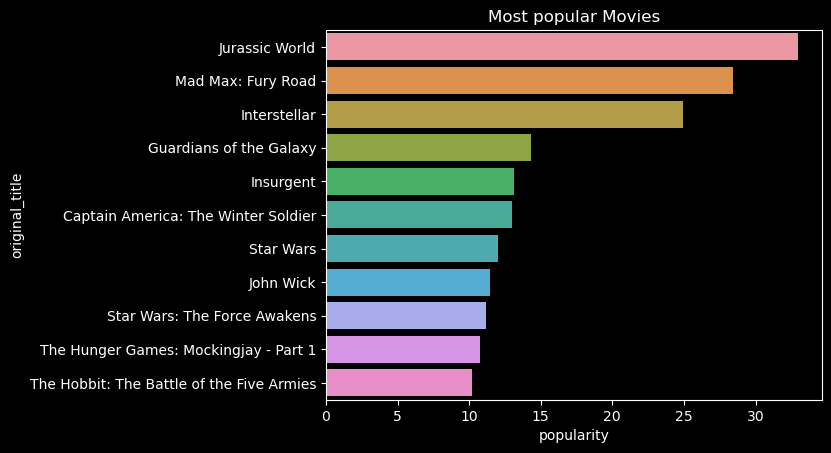

In [189]:
#barchart for top 10 movies in popularity
sns.barplot(x=top10_movies['popularity'],y=top10_movies['original_title'])
plt.title('Most popular Movies')
plt.show()

**_I notice that some movies of high popularity it comes from a series of movies like the hobbit ,star wars
so when the movie is from series related to each other its popularity increase_**

### Research Question 2  (Does popularity and vote_average affects the revenue ?)

In [190]:
#correlation in df
movie_df.corr(numeric_only=True)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
popularity,1.000000,0.514715,0.662835,0.136420,0.800614,0.217853,0.093109,0.481229,0.608373,0.042763
budget,0.514715,1.000000,0.724460,0.173074,0.614813,0.078170,0.131614,0.962272,0.598688,0.038131
revenue,0.662835,0.724460,1.000000,0.163803,0.790884,0.178430,0.059125,0.699015,0.918988,0.038739
runtime,0.136420,0.173074,0.163803,1.000000,0.164495,0.174994,-0.114854,0.207661,0.176994,0.065422
vote_count,0.800614,0.614813,0.790884,0.164495,1.000000,0.260515,0.110375,0.568161,0.707510,0.025993
vote_average,0.217853,0.078170,0.178430,0.174994,0.260515,1.000000,-0.127614,0.092333,0.199371,0.075376
release_year,0.093109,0.131614,0.059125,-0.114854,0.110375,-0.127614,1.000000,0.022060,-0.064903,-0.048404
budget_adj,0.481229,0.962272,0.699015,0.207661,0.568161,0.092333,0.022060,1.000000,0.629976,0.056220
revenue_adj,0.608373,0.598688,0.918988,0.176994,0.707510,0.199371,-0.064903,0.629976,1.000000,0.050592
release_month,0.042763,0.038131,0.038739,0.065422,0.025993,0.075376,-0.048404,0.056220,0.050592,1.000000


**_First : I checked if there is correlation between revenue and popularity and it is more than 0.5.
I wil make scatter plot between popularity and revenue to get the correlation betweeen them and determine if popularity affect the revenue._**

In [191]:
#  function for scatter plot using matplotlip recieve xaxis and yaxix and colour of points
def scatter_plot(xaxis,yaxis,colour):
    plt.scatter(movie_df[xaxis],movie_df[yaxis],edgecolor='red', linewidth=1, alpha=1)
    plt.title('relation between {} and {}'.format(xaxis,yaxis))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.tight_layout()
    plt.show()

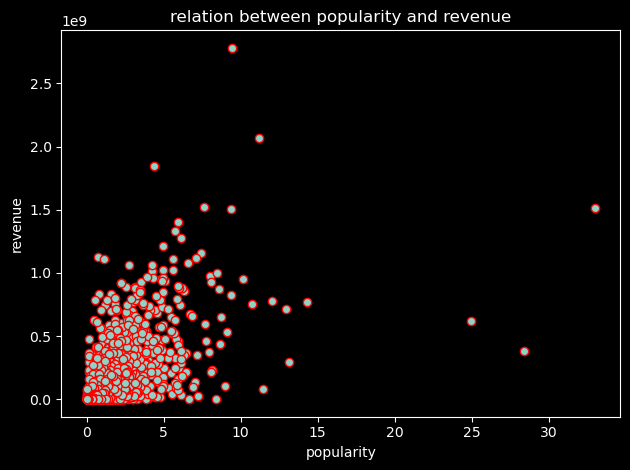

In [192]:
#call scatter_plot function give it popularity as xaxis , revenue as yaxis and red as colour 
scatter_plot('popularity','revenue','red')

**_From this scatter i notice that popularity affects the revenue_**

**_Second : I checked if there is correlation between revenue and vote_average and it is more than 0.
I wil make scatter plot between average and revenue to get the correlation betweeen them and determine if vote affect the revenue._**

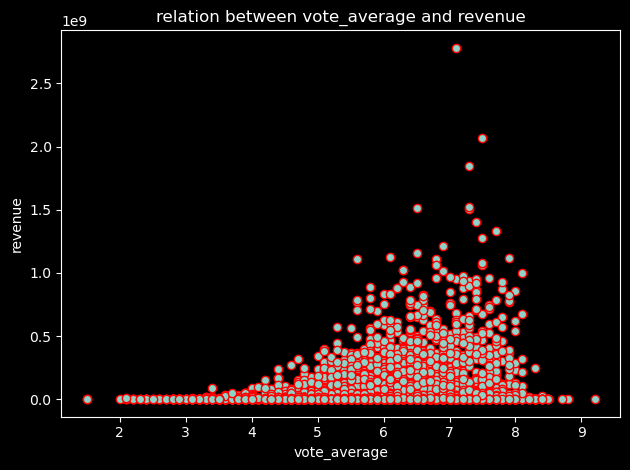

In [193]:
#call scatter_plot function give it vote_average as xaxis , revenue as yaxis and green as colour 
scatter_plot('vote_average','revenue','green')

**_From this scatter i notice that vote affects the revenue as when the votes increases the revenue of movie increases._**

**_I wil classify vote_average values to ['low', 'good','excellent'] according to vote value then i will groupby vote after classify and revenue to get more accurte distribution for my question._**

C:\Users\yous1\AppData\Local\Temp\ipykernel_11848\3835603462.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movie_df.groupby('vote_grades')['revenue'].mean().plot(kind='barh',title='The effect of the vote on revenue',xlabel='revenue')


<Axes: title={'center': 'The effect of the vote on revenue'}, xlabel='revenue', ylabel='vote_grades'>

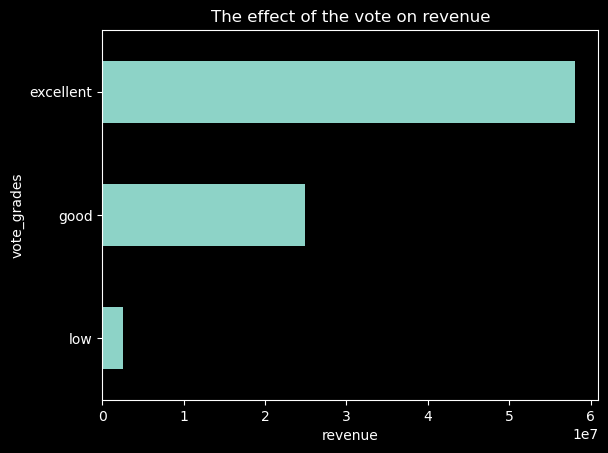

In [195]:
#classify vote to vote grades by using cut function 
movie_df['vote_grades'] = pd.cut(x=movie_df['vote_average'], bins=[0,4,6,10],labels=['low', 'good','excellent'])
#bar plot of relation between revenue and vote_grades 
movie_df.groupby('vote_grades')['revenue'].mean().plot(kind='barh',title='The effect of the vote on revenue',xlabel='revenue')

**_From this bar chart we notice that when the vote are low the revenue of movies decrease and when the vote is excellent the revenue is highest.
As we see above also from popularity in scatter plot and is affect on revenue.
So the answer of question  
Does popularity and vote_average affects the revenue ? 
Is Yes ._**

### Research Question 3  (classify movies according to profit [High profit, normal profit, low profit,No profit])

**_Fisrt : I will make column profit is the diff of revenue and budget.
Then I will classify it to movie profit [High profit, normal profit, low profit]._**

**_The movies of high profit are movies their profit is greater than their budget Once and a half.
The movie of normal profit their profit less high and not less than budget.
The movie of low profit their profit less than budget.
The movie of no profit that their profit it negative_**


<Axes: title={'center': 'Profit for Movies'}, ylabel='Profit_categories'>

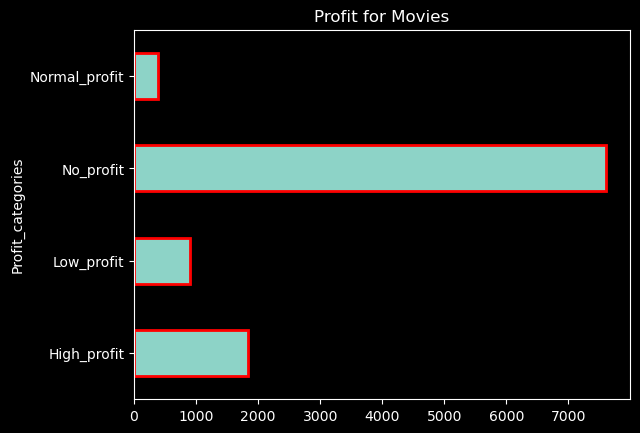

In [196]:
#first create new column for profit 
movie_df['profit']=movie_df['revenue']-movie_df['budget']
#the rules of classify 
rules = [(movie_df['profit'] <0),(movie_df['profit'] > -1) & (movie_df['profit'] <movie_df['budget']),(movie_df['profit'] >= movie_df['budget']) & (movie_df['profit'] < (movie_df['budget']*1.5)),(movie_df['profit'] >= movie_df['budget']*1.5) ]
classes = ['No_profit', 'Low_profit', 'Normal_profit', 'High_profit']
#use np select funtion to make column depend on rules
movie_df['Profit_categories']=np.select(rules,classes)
#use groupby to make bar chart for total column 
movie_df.groupby('Profit_categories')['Profit_categories'].value_counts().plot(kind='barh',edgecolor='red',linewidth=2,title='Profit for Movies')

**_Due to there more than 5000 rows with zero revenue no_profit is much in number of movies.
The movies of high profit are not to big  and low profit and normar profit are to low i concluede that because there is a lot of zero revenue may some of them human error._**

### Research Question 4  (what are top 10 movies in profit ?)

**_I will creat new df for sorted in profit and get top 10 movies in it._**

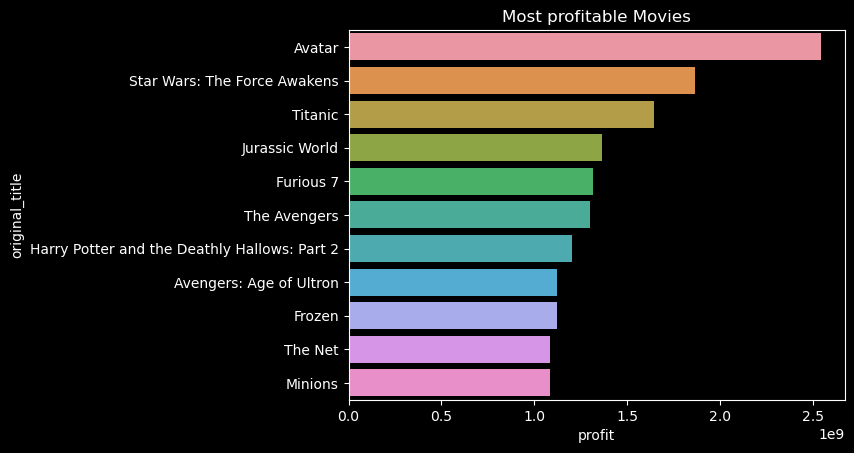

In [197]:
#create a new df for sorted by profit descending
profit_sorted = movie_df.sort_values(by='profit',ascending = False)
profit_sorted.reset_index(inplace=True)
#get top 10 movies in profit from profit df by using loc
top10_movies=profit_sorted.loc[:10,['original_title','profit']]
#bar plot for top 10 movies in plot
sns.barplot(x=top10_movies['profit'],y=top10_movies['original_title'])
plt.title('Most profitable Movies')
plt.show()

**_From this chart : the avatar is biggest one  and the profits of movies is near to each other except avatar._**

### Research Question 5 (what are top 10 movies in runtime ?)


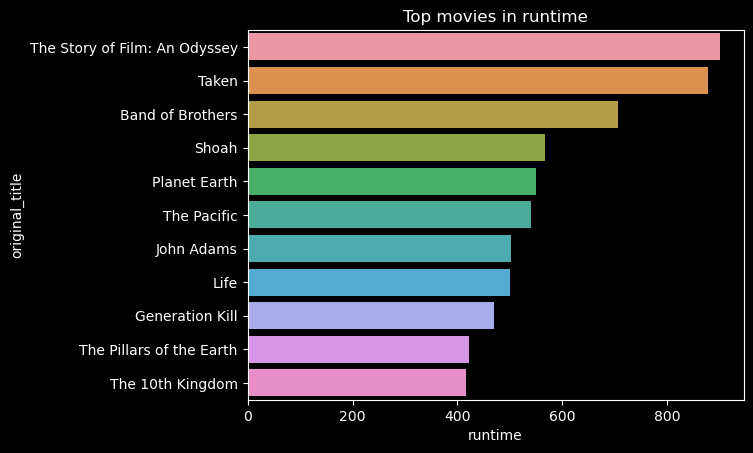

In [198]:
#create a new df for sorted by runtime descending
runtime_sorted = movie_df.sort_values(by='runtime',ascending = False)
runtime_sorted.reset_index(inplace=True)
#get top 10 movies in profit from profit df by using loc
top10_movies=runtime_sorted.loc[:10,['original_title','runtime']]
#bar plot for top 10 movies in plot
sns.barplot(x=top10_movies['runtime'],y=top10_movies['original_title'])
plt.title('Top movies in runtime')
plt.show()

**_The higest movies in runtime are more than 400 min_**

### Research Question 6  (what are least 10 movies in runtime ?)

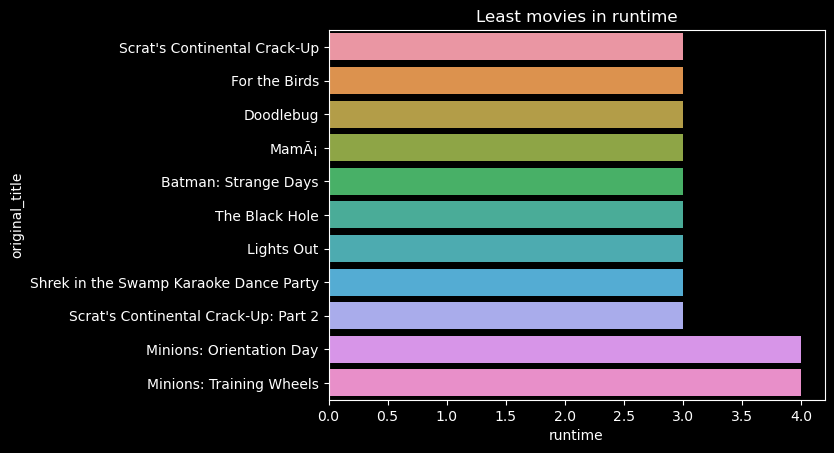

In [199]:
#create a new df for sorted by runtime ascending
runtime_sorted = movie_df.sort_values(by='runtime')
runtime_sorted.reset_index(inplace=True)
#get least 10 movies in profit from profit df by using loc
least10_movies=runtime_sorted.loc[:10,['original_title','runtime']]
#bar plot for least 10 movies in plot
sns.barplot(x=least10_movies['runtime'],y=least10_movies['original_title'])
plt.title('Least movies in runtime')
plt.show()

**_The most of least movies in runtime is animatiom like Minions and the least movie in rutime is more than 2 min._**

### Research Question 7  (what are top 10 actors in number of movies and genres of movies they make ?)

**_In this question i want to know top 10 actors in number of movies._**

**_I also want to know if success is based on one kind of movie, like a comedian, or can succeed in more than one type._**

**_First i have actors in cast column in list so i will create new df (cast_df) to keep my df as it is to use it later and explode cast to make every actor in row without list and make the same to genres in the cast_df and i will sort it descending and make bar plot for top 10._**

<Axes: title={'center': 'Top actors to number of movies'}, xlabel='number of movies', ylabel='cast'>

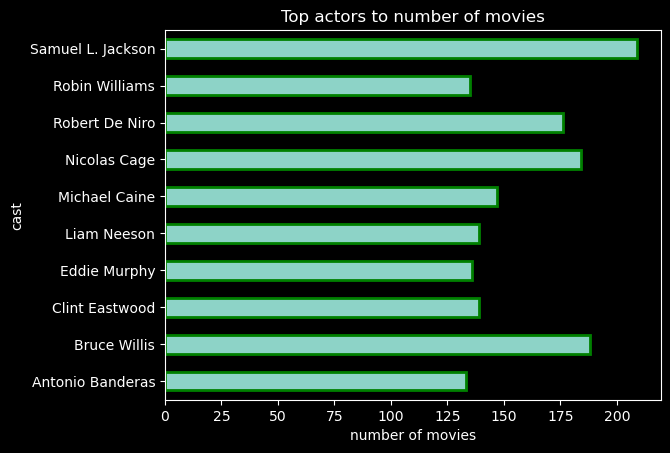

In [200]:
#creat new df and explode cast column
cast_df=movie_df.explode('cast')
#explode genres column 
cast_df=cast_df.explode('genres')
#count the number of actors  recordsa nd but the in list 
actors_counts = cast_df['cast'].value_counts()
#order actors according to movies in descending order
sorted_counts = actors_counts.sort_values(ascending=False)
#sort cast df according to number of movies of actors
cast_df = cast_df.sort_values(by='cast', key=lambda X: sorted_counts[X],ascending=False)
cast_df.reset_index(inplace=True)
#get index of top 10 
top=sorted_counts.index[:10]
top10=cast_df[cast_df['cast'].isin(top)]
#use groupby function to group between actors names and number of movies and visualize it
top10.groupby('cast')['cast'].count().plot(kind='barh',title='Top actors to number of movies',xlabel='number of movies',edgecolor='green',linewidth=2)

**_From this chart i see that all of them makes more than 125 movies and this is big number.
I want to know if all of these movies for an actor is from one genres or a more than one._**

In [201]:
#get the genress of movies of top actors 
genresofactors=top10.groupby('cast')['genres'].unique()
#print actors and the genres of movies the make 
print(genresofactors)

cast
Antonio Banderas     [Science Fiction, Romance, Crime, Action, Come...
Bruce Willis         [Thriller, Mystery, Crime, Adventure, Romance,...
Clint Eastwood       [Western, Comedy, Adventure, Mystery, Drama, A...
Eddie Murphy         [Family, Science Fiction, Animation, Comedy, F...
Liam Neeson          [Thriller, Crime, Horror, Fantasy, Action, Com...
Michael Caine        [Thriller, Drama, Crime, Mystery, Horror, Acti...
Nicolas Cage         [Drama, Horror, Crime, Thriller, History, Roma...
Robert De Niro       [History, Action, Drama, Science Fiction, Crim...
Robin Williams       [Family, Adventure, Romance, Fantasy, Science ...
Samuel L. Jackson    [Horror, Crime, Drama, Adventure, Action, Thri...
Name: genres, dtype: object


**_The actors can make movies of different types of genres like Antonio Banderas he makes movies in action and comedy._**
### Research Question 8 (what are top 10 actors in total of revenue ?)

**_First I want to know does when number of movies increase  revenue increase.
I will creat new df and arrange it descending according to reveneu and make bar chart to show top 10._**

<Axes: title={'center': 'Top actors of revenue'}, xlabel='sum of revenue', ylabel='cast'>

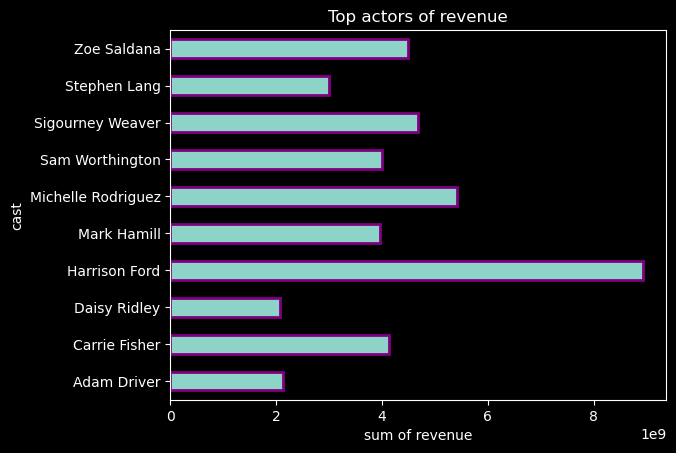

In [202]:
#creat new df and explode cast column
cast_df_revenue=movie_df.explode('cast')
#sort cast_df_revenue according sum of revenue of actors
cast_df_revenue = cast_df_revenue.sort_values(by='revenue',ascending=False)
cast_df_revenue.reset_index(inplace=True)
#get of top 10 
top=cast_df_revenue['cast'].head(10)
top10=cast_df_revenue[cast_df_revenue['cast'].isin(top)]
#use groupby function to group between actors names and sum of total revenue and visualize it
top10.groupby('cast')['revenue'].sum().plot(kind='barh',title='Top actors of revenue',xlabel='sum of revenue',edgecolor='purple',linewidth=2)

**_From this chart  the higest actor in total revnue is harrison ford .
The number of movies doesn't affect the revenue of actors._**

### Research Question 9 (what are top director in vote_avarage and the number of movies they make ?)

<Axes: title={'center': 'Top director of vote'}, xlabel='mean of vote', ylabel='director'>

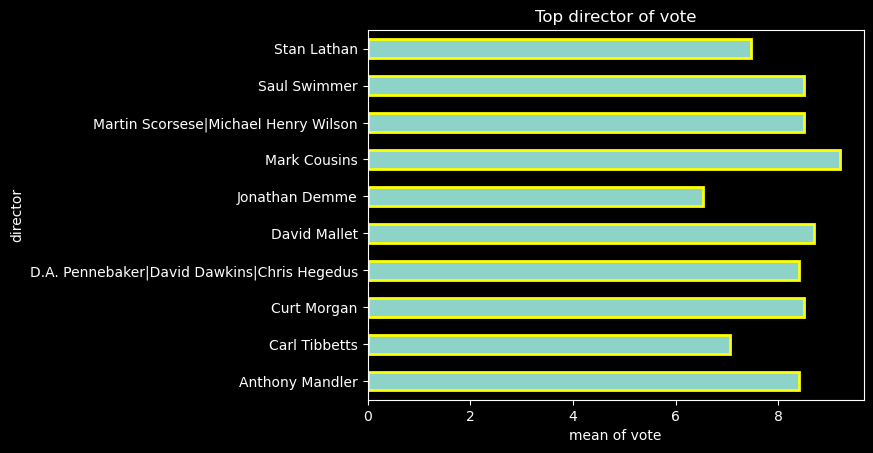

In [203]:
#creat new df 
director_df=movie_df
#sort director_df according vote_average of director
director_df = director_df.sort_values(by='vote_average',ascending=False)
director_df.reset_index(inplace=True)
#get of top 10 
top=director_df['director'].head(10)
top10=director_df[director_df['director'].isin(top)]
#use groupby function to group between director names and  and visualize it
top10.groupby('director')['vote_average'].mean().plot(kind='barh',title='Top director of vote',xlabel='mean of vote',edgecolor='yellow',linewidth=2)

### Research Question 10 (what top probuction companies in number of movies ?)

**_First i have companies in production_companies column in list so i will create new df (company_df) to keep my df as it is to use it later and explode production_companies to make every company in row without list and i will sort it descending and make bar plot for top 10._**

<Axes: title={'center': 'Top production companies to number of movies'}, xlabel='number of movies', ylabel='production_companies'>

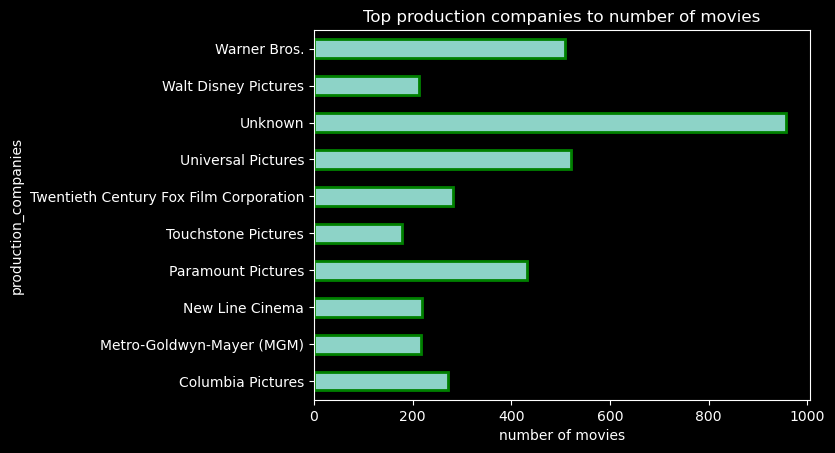

In [204]:
#creat new df and explode production compaines
company_df=movie_df.explode('production_companies')
#count the numner of production companies   records and but the in list 
company_count = company_df['production_companies'].value_counts()
#order compaines according to movies in descending order
sorted_counts = company_count.sort_values(ascending=False)
#sort company df according to number of movies of company
company_df = company_df.sort_values(by='production_companies', key=lambda y: sorted_counts[y],ascending=False)
company_df.reset_index(inplace=True)
#get index of top 10 
top=sorted_counts.index[:10]
top10=company_df[company_df['production_companies'].isin(top)]
#use groupby function to group between companies names and number of movies and visualize it
top10.groupby('production_companies')['production_companies'].count().plot(kind='barh',title='Top production companies to number of movies',xlabel='number of movies',edgecolor='green',linewidth=2)

**_In chart the unknown companies have Highest number of movies they were nan and i fill it with unknown.
And warner bros and universal companies are the most prosduced movies._**

### Research Question 11  (What production companies are ready to fund a big movie ?)

**_To answer this question i should know the mean budget to get top companies so i will make new df (company_df) and sort it by budget then i will use groupby to group between companies and  mean of budget._**

<Axes: title={'center': 'Companies that are able to fund huge movies'}, xlabel='mean of budget', ylabel='production_companies'>

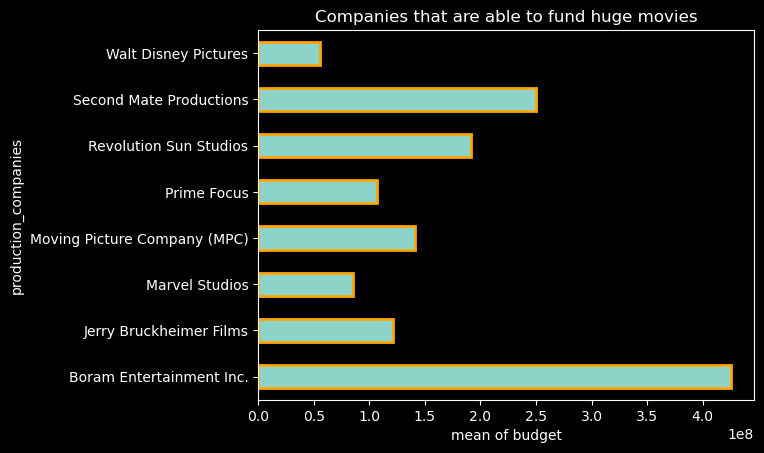

In [205]:
#creat new df 
company_df=movie_df.explode('production_companies')
#sort company_df according budget of company
company_df = company_df.sort_values(by='budget',ascending=False)
company_df.reset_index(inplace=True)
#get of top 10 
top=company_df['production_companies'].head(10)
top10=company_df[company_df['production_companies'].isin(top)]
#use groupby function to group between company names and  mean of budget and visualize it
top10.groupby('production_companies')['budget'].mean().plot(kind='barh',title='Companies that are able to fund huge movies',xlabel='mean of budget',edgecolor='orange',linewidth=2)

**_According to what companies paid to make movies we can get which companies are able to fund big movies like Boran company._**

### Research Question 12 (What are the most profitable companies ?)

**_To answer I will make new df (company_df) and sort it by profit then i will use groupby to group between companies and profit._**

<Axes: title={'center': 'Most profitable companies'}, xlabel='Profit', ylabel='production_companies'>

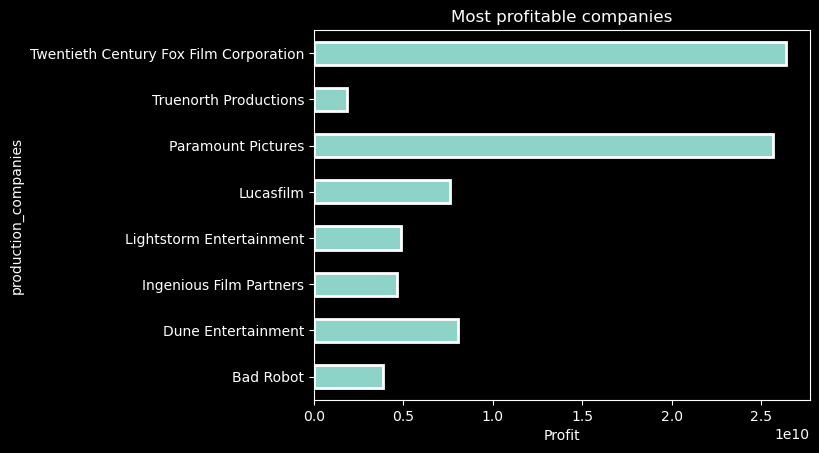

In [206]:
#creat new df 
company_df=movie_df.explode('production_companies')
#sort company_df according profit of company
company_df = company_df.sort_values(by='profit',ascending=False)
company_df.reset_index(inplace=True)
#get of top 10 
top=company_df['production_companies'].head(10)
top10=company_df[company_df['production_companies'].isin(top)]
#use groupby function to group between company names and  mean of budget and visualize it
top10.groupby('production_companies')['profit'].sum().plot(kind='barh',title='Most profitable companies',xlabel='Profit',edgecolor='white',linewidth=2)

**_The most companies gains profit form their movies.
Highest 2 companies in profit are paramount and fox film._**

### Research Question 13  (Does the number of movies produced increase over the years ?)

**_First i will get the total number pf movies produced per year._**

In [207]:
#totak number of movies per year by using groupby
movies_to_years=movie_df.groupby('release_year')['release_year'].count()
#print it
print(movies_to_years)

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     38
1968     38
1969     30
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     56
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    104
1985    108
1986    120
1987    124
1988    142
1989    135
1990    132
1991    133
1992    132
1993    177
1994    184
1995    174
1996    203
1997    191
1998    210
1999    224
2000    224
2001    241
2002    264
2003    281
2004    307
2005    361
2006    404
2007    432
2008    486
2009    525
2010    475
2011    530
2012    574
2013    649
2014    682
2015    617
Name: release_year, dtype: int64


**_we see that the number of movies increases by year._**

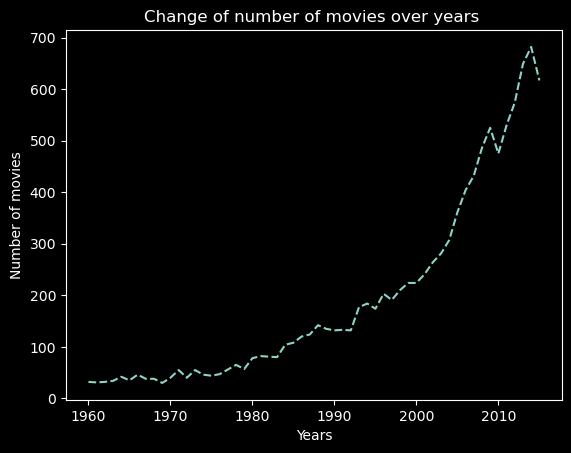

In [208]:
#plot of change of number of movies over years
plt.plot(movies_to_years,'--')
plt.title('Change of number of movies over years ')
plt.ylabel('Number of movies')
plt.xlabel('Years')
plt.show()

**_From this chart i coclude that : The number of movies is increases every year_**

**_The number of movies form 1960 to 1070 per year are less than 100 because in this period where technology of movies and tv are just inveted so not all of people have tv and go to cinema._**

**_The number movies from 1970 to 1990 increaed slowly from less 100 to more than 100 movies per the technologies evolved and computer are Spreaded that help companies to make more movies._**

**_From 1990 till now increaed faster and became more than 700 per year is huge increase due to evolve of internet and electonic devices and people can get any movie they want to see online and marketing became global._**

### Research Question 14 (Are the movies released in the year specific to a specific season according to the months ?)

**_In this question i want to know if the movie is release in seasons in year to get high profit._**

In [209]:
#count the number of movies released per months by using groupby
movies_to_months = movie_df.groupby('release_month')['release_month'].count()
#print it
print(movies_to_months)

release_month
1      892
2      680
3      813
4      791
5      807
6      822
7      790
8      906
9     1318
10    1138
11     798
12     974
Name: release_month, dtype: int64


**_The number of movies changes in months like in 10 , 9 months is more than 1300 and other is less 1000._**

<Axes: xlabel='release_month', ylabel='Numbers of movies'>

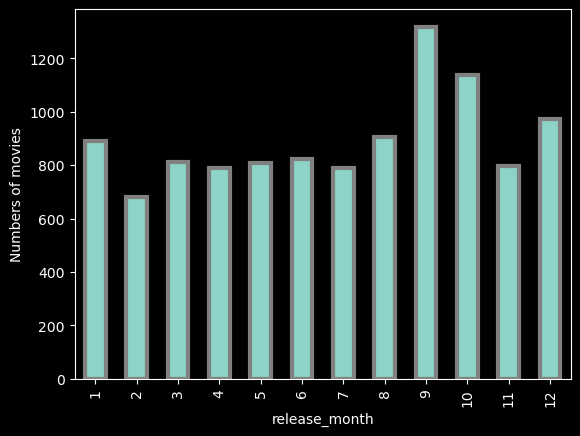

In [210]:
#visualize to make it more clear 
movie_df.groupby('release_month')['release_month'].count().plot(kind='bar',title='',ylabel='Numbers of movies',edgecolor='gray',linewidth=3)

**_The end of the year from 8 to 12 and in jan. have high number of movies._**

**_I wil get the total of movies to seasons of year._**

<Axes: title={'center': 'Number of movies in seasons'}, xlabel='Number of movies', ylabel='seasons'>

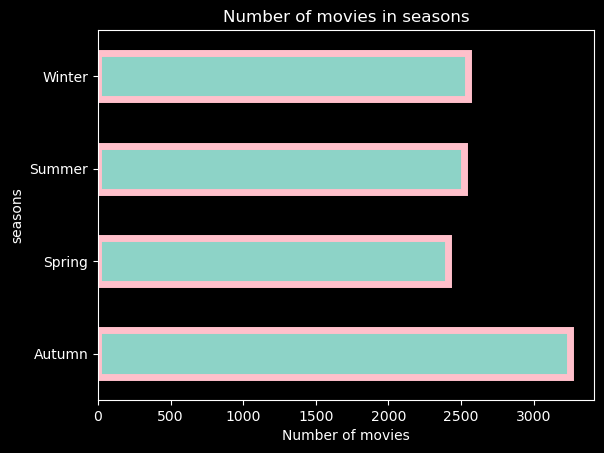

In [211]:
#coditions to classify months to seasons
rules = [(movie_df['release_month'] <3) | (movie_df['release_month'] ==12) ,(movie_df['release_month'] >2) & (movie_df['release_month'] <6),(movie_df['release_month'] >5) & (movie_df['release_month'] <9),(movie_df['release_month'] >8) & (movie_df['release_month'] <12) ]
classes = ['Winter', 'Spring', 'Summer', 'Autumn']
#make new column for season
movie_df['seasons']=np.select(rules,classes)
#chart for number of movies to seasons
movie_df.groupby('seasons')['release_month'].count().plot(kind='barh',title='Number of movies in seasons',xlabel='Number of movies',edgecolor='pink',linewidth=5)

**_From this charh i see that autumn has the biggest number of movies to other seasons._**

**_In these months, holidays and events such as Christmas, Halloween, vacations, encourage companies to make more movies in these periods of the year, which helps to increase profits in autumn season and 1,9 and 10 months._**

### Research Question 15 (What is the total number of movies in each genre ? )

<Axes: title={'center': 'The number of movies in each genres'}, xlabel='counts', ylabel='genres'>

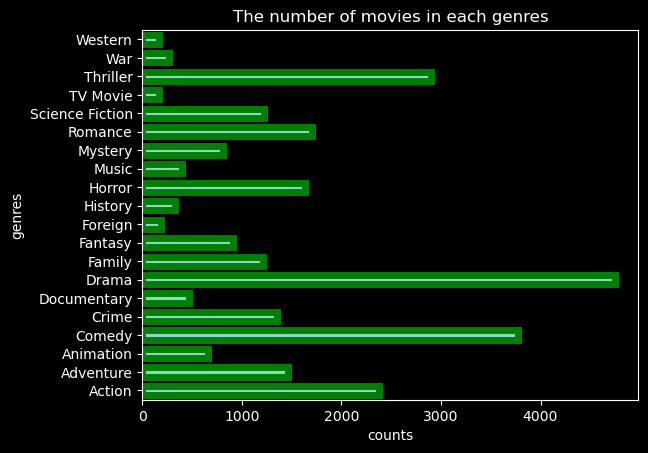

In [212]:
#create new df for genres
genres_df=movie_df.explode('genres')
#use groupby to get the number of movies in each genres and visualize it
genres_df.groupby('genres').size().plot(kind='barh',title='The number of movies in each genres',xlabel='counts',edgecolor='green',linewidth=5)

**_Top 4 genres are Drama , Action , crime and thriller are more than 2000 movies._**

**_The other genres are less 200 movies and because people looking for top 4 genres much than other._**

### Research Question 16 (What is the number of movies in the top 5 genres over the years ?)

**_First : I have years from 1960 to 2015 and this is huge number of years to visulize it so first i will create new column decade and divide this years to decade._**

**_Second : I will create new df and explode genres column from list of strings to string in each row an order it descending to number of movies to each genres then i will visualize top 5 genres to see the changes of number of moives to it over decades._**

In [213]:
#function to get decade by divide year by 10 without remined and multiply it by 10 to retern it as year again
def classifytodecade(year):
  return (year // 10) * 10
#classify years to decades by using appy and call classifytodecade func. to get decade
movie_df['decade'] = movie_df['release_year'].apply(classifytodecade)
#show top 5 rows of df after divided years to decades 
movie_df.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,...,vote_average,release_year,budget_adj,revenue_adj,release_month,vote_grades,profit,Profit_categories,seasons,decade
0,32.985763,150000000.0,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",...,6.5,2015,1.379999e+08,1.392446e+09,6,excellent,1.363529e+09,High_profit,Summer,2010
1,28.419936,150000000.0,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",...,7.1,2015,1.379999e+08,3.481613e+08,5,excellent,2.284364e+08,High_profit,Spring,2010
2,13.112507,110000000.0,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",...,6.3,2015,1.012000e+08,2.716190e+08,3,excellent,1.852382e+08,High_profit,Spring,2010
3,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",...,7.5,2015,1.839999e+08,1.902723e+09,12,excellent,1.868178e+09,High_profit,Winter,2010
4,9.335014,190000000.0,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",...,7.3,2015,1.747999e+08,1.385749e+09,4,excellent,1.316249e+09,High_profit,Spring,2010


<Axes: title={'center': 'Top 5 genres over years'}, xlabel='decade', ylabel='Number of movies'>

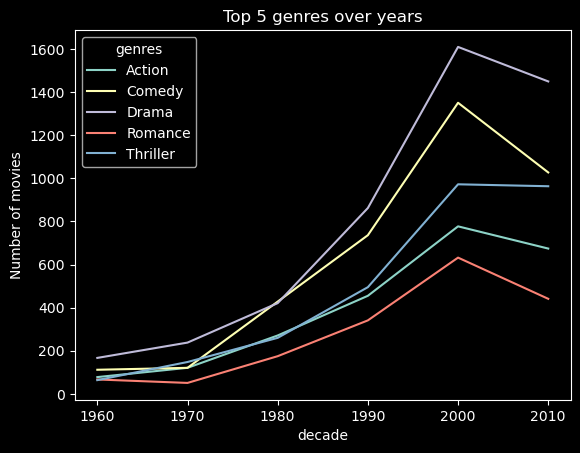

In [214]:
#create new df and explode genres in new df
genres_df_years=movie_df.explode('genres')
#count the number of genres records and but the in list 
genres_count = genres_df_years['genres'].value_counts()
#order genres to movies in descending order
sorted_counts_genres = genres_count.sort_values(ascending=False)
#sort genres df according to number of movies of each genres
genres_df_years = genres_df_years.sort_values(by='genres', key=lambda y: sorted_counts_genres[y],ascending=False)
genres_df_years.reset_index(inplace=True)
#get index of top 10 
top5=sorted_counts_genres.index[:5]
top_5=genres_df_years[genres_df_years['genres'].isin(top5)]
#use groupby function to group between decade and top 5 genres and visualize it
top_5.groupby(['decade', 'genres']).size().unstack().plot(title='Top 5 genres over years',xlabel='decade',ylabel='Number of movies')

**_Top 5 geners are action , comedy , drama , romance and thriller._**

**_The number of movies in each genres started io increase from 1970 to 2010 as we also see above the changes of numbrt og movies after apear internet._**

### Research Question 17  (what is profits types of movies over years ?)

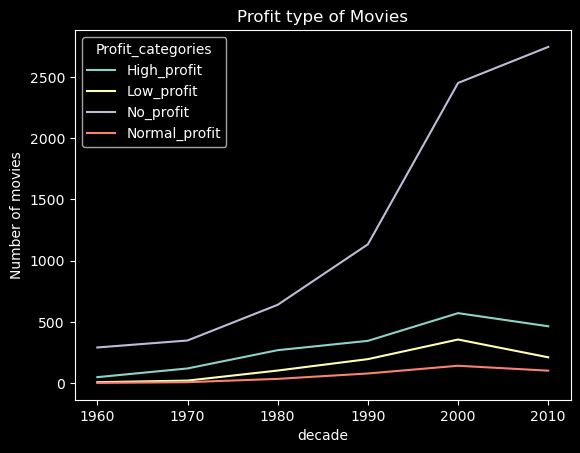

In [215]:
#use groupby to get the profit type of movies over decade 
movies = movie_df.groupby(['decade','Profit_categories']).size().unstack().plot(title='Profit type of Movies',xlabel='decade',ylabel='Number of movies')

### Research Question 18  (Classify movies as successful or failed.)

**_Conditions of movies classsify:_**
<ul>
    <li>First : If profit of movie more than 0 then this movie is successful.</li>
    <li>Second : If profit of movie less than 0 and the genres of movie isn't documentary is failed.</li>
    <li>Third : If Movie is documentary and its vote isn't low is successful.</li>
    <li>Fourth : If Movie is documentary and its vote is failed.</li>
</ul>

In [216]:
#function to classify movies to conditions
def classiymovies(df):
  if df['profit'] > 0 :
      return 'successful'
  elif df['profit'] <=0 and 'Documentary' not in df['genres']:
      return 'failed'
  elif df['profit'] <=0 and 'Documentary' in df['genres'] and df['vote_grades']!='low' :
      return 'successful'
  else :
      return 'failed'
#create new column for movie classify
movie_df['Movies_status'] = movie_df.apply(classiymovies,axis=1)
#df after addding new column
movie_df.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,...,release_year,budget_adj,revenue_adj,release_month,vote_grades,profit,Profit_categories,seasons,decade,Movies_status
0,32.985763,150000000.0,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",...,2015,1.379999e+08,1.392446e+09,6,excellent,1.363529e+09,High_profit,Summer,2010,successful
1,28.419936,150000000.0,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",...,2015,1.379999e+08,3.481613e+08,5,excellent,2.284364e+08,High_profit,Spring,2010,successful
2,13.112507,110000000.0,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",...,2015,1.012000e+08,2.716190e+08,3,excellent,1.852382e+08,High_profit,Spring,2010,successful
3,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",...,2015,1.839999e+08,1.902723e+09,12,excellent,1.868178e+09,High_profit,Winter,2010,successful
4,9.335014,190000000.0,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",...,2015,1.747999e+08,1.385749e+09,4,excellent,1.316249e+09,High_profit,Spring,2010,successful


### Research Question 19  (The number of movies over years are successful and failed.)

<Axes: title={'center': 'The number of movies atatus of years'}, xlabel='decade', ylabel='Number of movies'>

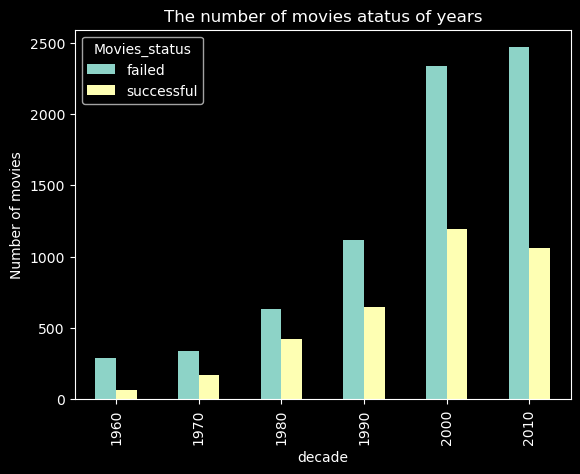

In [217]:
#use groupby function to the number of movies over years are successful and failed
movie_df.groupby(['decade', 'Movies_status']).size().unstack().plot(kind='bar',title='The number of movies atatus of years',xlabel='decade',ylabel='Number of movies')

**_The number of failed movies is less than number of successful movies, I think that becaues huge number of movies have 0 revenue._**

### Research Question 20  (What are the number of successful and failed movies in the 20th and 1st centuries? )

**_First : I will create new column and divide years to centuries less 2000 is 20 century and more than or equal 2000 is 21 century._**

**_Second  : I visualize number of movies over centuries is successful and failed._**

In [218]:
#function to classify years to centuries 
def century(df):
   if df['release_year'] < 2000 : 
       return '20'
   else : 
       return '21'
#create new column for century classify
movie_df['century'] = movie_df.apply(century,axis=1)
#df after adding new column
movie_df.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,...,budget_adj,revenue_adj,release_month,vote_grades,profit,Profit_categories,seasons,decade,Movies_status,century
0,32.985763,150000000.0,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",...,1.379999e+08,1.392446e+09,6,excellent,1.363529e+09,High_profit,Summer,2010,successful,21
1,28.419936,150000000.0,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",...,1.379999e+08,3.481613e+08,5,excellent,2.284364e+08,High_profit,Spring,2010,successful,21
2,13.112507,110000000.0,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",...,1.012000e+08,2.716190e+08,3,excellent,1.852382e+08,High_profit,Spring,2010,successful,21
3,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",...,1.839999e+08,1.902723e+09,12,excellent,1.868178e+09,High_profit,Winter,2010,successful,21
4,9.335014,190000000.0,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",...,1.747999e+08,1.385749e+09,4,excellent,1.316249e+09,High_profit,Spring,2010,successful,21


<Axes: title={'center': 'The number of movies status over centuries'}, xlabel='centuries', ylabel='Number of movies'>

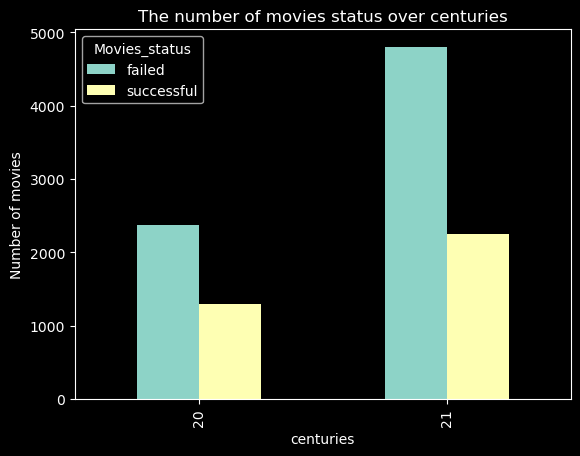

In [219]:
#use groupby to get relation between changes of movies in two centuries 
movie_df.groupby(['century', 'Movies_status']).size().unstack().plot(kind='bar',title='The number of movies status over centuries',xlabel='centuries',ylabel='Number of movies')

**_We see huge different in number of movies in 20 cetury and 21 cetury almost double number of movies is increased due to evolve of technology and internet._**

<a id='conclusions'></a>
## Conclusion :
**_I will summarize my findings from the movie data set in key points after I have finished examining it, looking for trends, and asking questions :_**
**_First, there are a variety of factors that affect how much money movies make and these factors are :_**
<ul>
    <li>popularity and movie revenue i see that movies with more popular than other have more revenue.</li>
    <li>choosing a suitable and famous actors in movies is important for movies.</li>
    <li>budget of movies doen't affect the revenue some movies there budget is not too big and there revenue is high.</li>
    <li>when the vote of movie increase that leads more people to ask about it</li>
</ul>

**_Second : Date and it relation between the data :_**

_We can observe from the data that the number of films produced has grown over time, and that the film industry has expanded in parallel with developments in technology and the growth of communication tools and the internet, which have made it possible for new films to be distributed globally, and that film production companies select the best time to release their films, as we can see from the seasons._

**_Thirs : Genres :_*

_In terms of genres, we observe the vast differences in film genres and the successful roles that well-known actors play in a variety of successful movie genres. We also note how popular certain genres become over time and how documentary films end up with zero revenue. We categorize films as successful or failed based on their profitability and genres._


**_How movie production companies boost their film's earnings ?_**

_In my opinion, and based on the data analysis, to maximize the profits from your film, make sure to market it well, select a well-known and accomplished director and cast, and select a good release date, such as the start or end of the year or a vacation period._

**_Additional Research :_**

_I'll continue to look into other variables that influence the box office success of films, such as the production country and language, and I'll work to fill in the data gaps and find the reasons behind them._
### Limitations:
**_There is some problems in dataset was big problem to me and Obstruction for me in analysis are :_**
<ul>
    <li>More than half of [budget,revenue,budget_adj,revenue_adj]  columns was zeroes.</li>
    <li>The precentage of missing values in [keywords,tagline] columns so that lead me to delete all colum without use it in my analysis.</li>
    <li>Huge number of outliers in all quantitive columns that gives me sometimes gives me unaccurate visualizations.</li>
    <li>More than 8 precentage of companies is missing that lead me to fill it with unknown and i lost a valuable information cloud be useful in analysis.</li>
</ul>


